In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
train_df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv')
train_df.head()

In [ ]:
test_tags = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

In [ ]:

valid_df = pd.concat([test_df,test_tags], axis=1)
valid_df

In [ ]:
import re,string
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

valid_df['comment_text'] = valid_df['comment_text'].map(lambda com : clean_text(com))

In [ ]:
def map_labels(label):
    if label == -1:
        return 0  
    else:
        return label

In [ ]:
train_df

In [ ]:
valid_df

In [ ]:
test_df

In [ ]:
train_x=train_df['comment_text'][:5000]
train_y=train_df['toxic'][:5000]


valid_x=valid_df['comment_text'][:2000]
valid_y=valid_df['toxic'].apply(lambda x:map_labels(x))[:2000]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

In [ ]:
vocab_size=10000

tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_x)

x_train = tokenizer.texts_to_matrix(train_x, mode='tfidf')
x_valid = tokenizer.texts_to_matrix(valid_x, mode='tfidf')

encoder=LabelBinarizer()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_valid = encoder.transform(valid_y)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

In [ ]:
x_test

In [100]:
embedding_dim=15
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=x_train.shape[1]))
model.add(LSTM(units=32))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10000, 15)         150000    
                                                                 
 lstm_10 (LSTM)              (None, 32)                6144      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 156177 (610.07 KB)
Trainable params: 156177 (610.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:


model.compile(loss='binary_crossentropy', #categorical cross...obtains the loss for multiple classes (i.e. categories entertainment, politcs...). Need to use with Softmax act function
              optimizer='adam', #adam is an optimization function to minimize the y' value in the loss function. A typical optimization function used in text classification.
              metrics=['accuracy']) #in the absence of confusion matrix, we can just use accuracy as metric.

history = model.fit(x_train, y_train,    #fitting the model with the training set (x-train), y-train(training set data's tags encoded) The annotated dataset.
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )

Epoch 1/10
157/157 [==============================] - 49s 294ms/step - loss: 0.3626 - accuracy: 0.8994 - val_loss: 0.1968 - val_accuracy: 0.9600
Epoch 2/10
157/157 [==============================] - 44s 280ms/step - loss: 0.3272 - accuracy: 0.8994 - val_loss: 0.1870 - val_accuracy: 0.9600
Epoch 3/10
157/157 [==============================] - 43s 277ms/step - loss: 0.3268 - accuracy: 0.8994 - val_loss: 0.2011 - val_accuracy: 0.9600
Epoch 4/10
157/157 [==============================] - 44s 278ms/step - loss: 0.3277 - accuracy: 0.8994 - val_loss: 0.1988 - val_accuracy: 0.9600
Epoch 5/10
157/157 [==============================] - 43s 277ms/step - loss: 0.3271 - accuracy: 0.8994 - val_loss: 0.1835 - val_accuracy: 0.9600
Epoch 6/10
157/157 [==============================] - 43s 276ms/step - loss: 0.3272 - accuracy: 0.8994 - val_loss: 0.1948 - val_accuracy: 0.9600
Epoch 7/10
157/157 [==============================] - 43s 274ms/step - loss: 0.3268 - accuracy: 0.8994 - val_loss: 0.2061 - val_ac

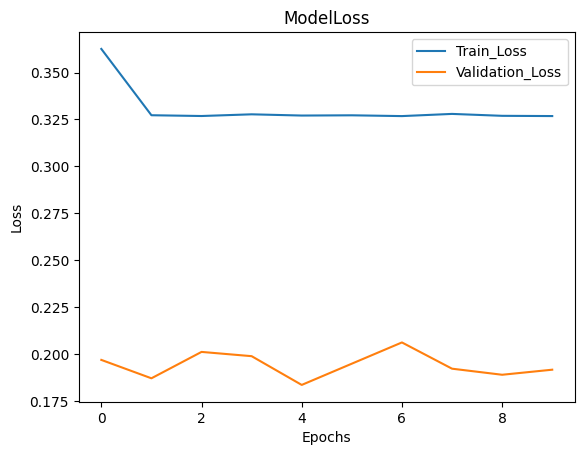

In [102]:

import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_Loss','Validation_Loss'],loc='upper right')
plt.show()

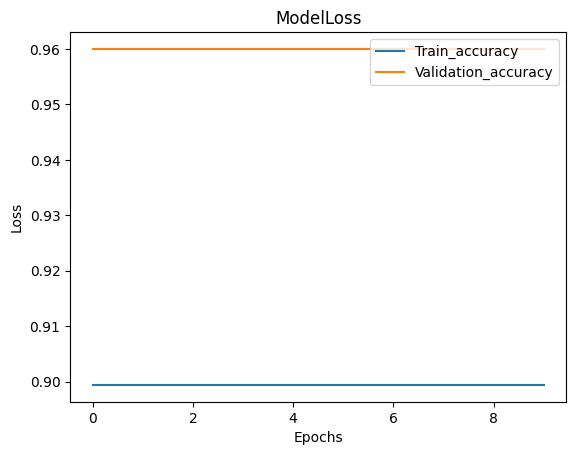

In [104]:

import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_accuracy','Validation_accuracy'],loc='upper right')
plt.show()

In [115]:
text_labels = encoder.classes_
print("These are categories", text_labels)

for i in range(100):  # Range can be adjusted based on the size of your validation set
    prediction = model.predict(np.array([x_valid[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    
    # Print the actual and predicted labels
    print(f"Actual label: {str(y_valid[i])}")  # Convert to string
    print(f"Predicted label: {predicted_label}")
    
    # Print the probability distribution of predictions
    print("Prediction probabilities:")
    for label, prob in zip(text_labels, prediction[0]):
        print(f"{label}: {prob:.4f}")
    
    # Print the text of the sample
    print(f"Text: {x_valid[i]}\n{'='*50}\n")  # Use indexing for NumPy array


These are categories [0 1]
1/1 [==============================] - 0s 128ms/step
Actual label: [0]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0.         0.         0.98417486 ... 0.         0.         0.        ]

1/1 [==============================] - 0s 129ms/step
Actual label: [0]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0.         0.91617075 0.         ... 0.         0.         0.        ]

1/1 [==============================] - 0s 122ms/step
Actual label: [0]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 122ms/step
Actual label: [0]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0.         2.39069069 0.         ... 0.         0.         0.        ]

1/1 [==============================] - 0s 121ms/step
Actual label: [0]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 12

In [116]:
# Find indices of samples with actual label 1 in valid_y
label_1_indices = np.where(valid_y == 1)[0]

# Iterate over the samples with actual label 1
for i in label_1_indices:
    # Make a prediction for the current sample
    prediction = model.predict(np.array([x_valid[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    
    # Print information about the prediction and the text of the sample
    print(f"Actual label: {str(y_valid[i])}")
    print(f"Predicted label: {predicted_label}")
    print("Prediction probabilities:")
    for label, prob in zip(text_labels, prediction[0]):
        print(f"{label}: {prob:.4f}")
    
    print(f"Text: {x_valid[i]}\n{'='*50}\n")


1/1 [==============================] - 0s 133ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 123ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 123ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 123ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0.         0.91617075 0.         ... 0.         0.         0.        ]

1/1 [==============================] - 0s 131ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [==============================] - 0s 125ms/step
Actual label: [1]
Predicted label: 0
Prediction probabilities:
0: 0.0975
Text: [0. 0. 0. ... 0. 0. 0.]

1/1 [=====